In [31]:
import pandas as pd

# Load the CSV file to examine its contents
file_path = '../commerce/E-commerce.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


# Tratamento dos dados

In [32]:
import ast

# Function to safely parse strings into Python objects (if possible)
def parse_history(history):
    try:
        return ast.literal_eval(history)
    except (ValueError, SyntaxError):
        return None

# Parsing the Purchase History and Browsing History columns to convert them into Python lists/dictionaries
df['Purchase History'] = df['Purchase History'].apply(parse_history)
df['Browsing History'] = df['Browsing History'].apply(parse_history)

# Extracting relevant information for analysis
# For Purchase History: Extract Date, Category, and Price (if available)
purchase_expanded = []
for index, row in df.iterrows():
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    if isinstance(purchase_history, list):
        for purchase in purchase_history:
            date = purchase.get('Date') or purchase.get('Purchase Date')
            category = purchase.get('Category') or purchase.get('Product Category')
            price = purchase.get('Price', None)
            purchase_expanded.append((customer_id, date, category, price))

# Creating a new DataFrame for Purchase History
purchase_df = pd.DataFrame(purchase_expanded, columns=['Customer ID', 'Date', 'Category', 'Price'])

# Converting 'Date' to datetime for time-based analysis
purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Displaying the cleaned purchase DataFrame
purchase_df.head()


,Customer ID,Date,Category,Price
0,1001,2022-03-05,Clothing,34.99
1,1001,2022-02-12,Electronics,129.99
2,1001,2022-01-20,Home & Garden,29.99
3,1001,2022-05-15,Clothing,34.56
4,1001,2022-06-02,Electronics,150.99


# Plotando um gráfico do preço ao longo do tempo

*  Análise de tendências de preços ao longo do tempo.
*  O objetivo é visualizar como os preços médios dos produtos variam mês a mês.
*  Permite identificar tendências como aumento, queda ou estabilização dos preços.

## Perguntas com dados 

Podemos verificar se há uma tendência de crescimento ou queda nos preços e em quais períodos isso ocorre. ?

Em quais meses ou épocas do ano os preços tendem a ser mais altos ou mais baixos ?





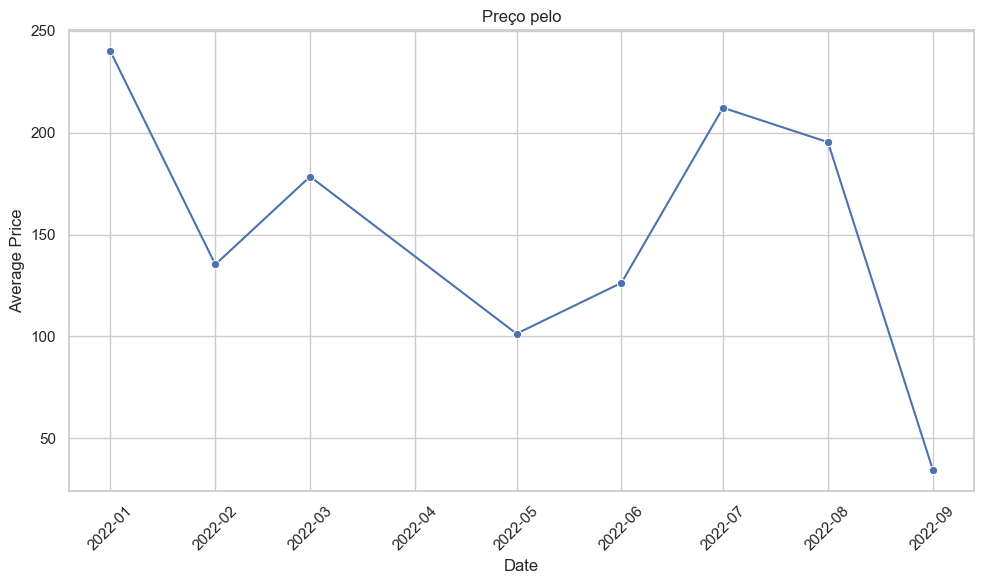

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Analyzing price trends over time
price_trend = purchase_df.groupby(purchase_df['Date'].dt.to_period('M')).agg({'Price': 'mean'}).reset_index()
price_trend['Date'] = price_trend['Date'].dt.to_timestamp()

# Plotting the price trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trend, x='Date', y='Price', marker='o', color='b')
plt.title('Preço pelo')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Identicando meses com mais ou menos vendas

* Sazonalidade: Podemos identificar se há sazonalidade nas vendas, ou seja, se existem meses do ano com picos (ex.: dezembro, por conta do Natal) ou baixas (ex.: janeiro, pós-festas) que podem ser usados para planejar promoções e campanhas.

* Planejamento de Estoque: Saber quais meses têm maior demanda permite um melhor planejamento de estoque, evitando falta de produtos em períodos de alta e excessos em períodos de baixa.

* Oportunidades de Marketing: Períodos de baixa nas vendas podem ser alvos de campanhas promocionais específicas para aumentar o tráfego e o volume de vendas nesses meses.

## Perguntas 

Os preços seguem um padrão sazonal?
O gráfico pode mostrar variações cíclicas nos preços em determinados meses ou épocas do ano, como aumento de preços antes de feriados ou promoções.

Em quais meses os preços atingem o seu ponto mais alto ou mais baixo ?

Os preços retornam ao normal após os picos de eventos ?


Mês com mais vendas: 6 (Total de vendas: 9)
Mês com menos vendas: 9 (Total de vendas: 1)


C:\Users\felip\AppData\Local\Temp\ipykernel_696\1894873400.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


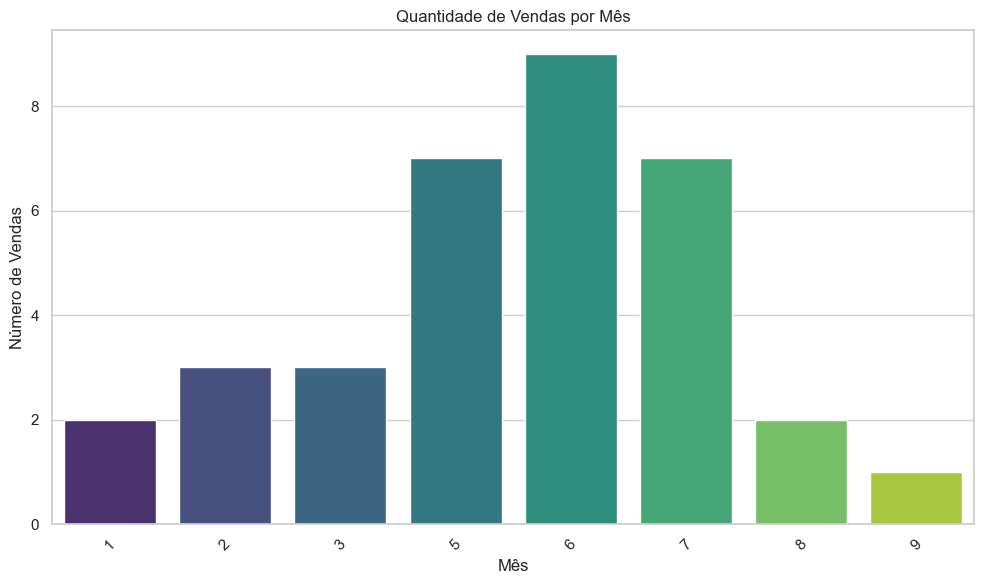

In [25]:
import pandas as pd

# Assumindo que purchase_df já contém os dados das compras e que a coluna 'Date' já está em formato datetime
# Se ainda não estiver, podemos converter a coluna para datetime usando:
# purchase_df['Date'] = pd.to_datetime(purchase_df['Date'], errors='coerce')

# Criando uma nova coluna que extrai o mês da data de cada compra
purchase_df['Month'] = purchase_df['Date'].dt.month

# Contando o número de compras por mês
monthly_sales = purchase_df['Month'].value_counts().sort_index()

# Identificando o mês com mais e menos vendas
month_most_sales = monthly_sales.idxmax()
month_least_sales = monthly_sales.idxmin()

# Exibindo os resultados
print(f"Mês com mais vendas: {month_most_sales} (Total de vendas: {monthly_sales[month_most_sales]})")
print(f"Mês com menos vendas: {month_least_sales} (Total de vendas: {monthly_sales[month_least_sales]})")

# Visualizando a quantidade de vendas por mês
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Atualizando nomes das colunas para o português

In [26]:

# Também é necessário atualizar as colunas do DataFrame de compras
purchase_df.rename(columns={
    'Customer ID': 'ID do Cliente',
    'Date': 'Data',
    'Category': 'Categoria',
    'Price': 'Preço',
    'Month': 'Mes'
}, inplace=True)

purchase_df.head()



,ID do Cliente,Data,Categoria,Preço,Mes
0,1001,2022-03-05,Clothing,34.99,3
1,1001,2022-02-12,Electronics,129.99,2
2,1001,2022-01-20,Home & Garden,29.99,1
3,1001,2022-05-15,Clothing,34.56,5
4,1001,2022-06-02,Electronics,150.99,6


# análise descritiva dos preços por categoria e para visualizar a distribuição de preços com um boxplot. 

*  O objetivo principal dessa análise é entender como os preços variam dentro de cada categoria, identificar padrões, possíveis outliers e tirar conclusões sobre a variação de preços.

* count: Número de produtos em cada categoria.
mean: Média dos preços (preço médio).
std: Desvio padrão, que mede a dispersão dos preços.
min e max: Preços mínimo e máximo.
quartis: Valores nos percentis 25%, 50% (mediana) e 75%, que ajudam a entender como os preços estão distribuídos dentro de cada categoria.

* Importância: Essa análise estatística fornece uma visão quantitativa da variação de preços em cada categoria. Com essas informações, podemos identificar categorias com preços mais baixos, mais altos e aquelas com maior variação de preços.

* Se uma categoria tem uma média de preço alta e um desvio padrão elevado, isso sugere que os preços nessa categoria variam bastante (há itens tanto baratos quanto caros).

## Perguntas

Quais categorias têm os preços mais altos e mais baixos em média ?

Qual é a amplitude de preços em cada categoria ?

Existem outliers nos preços de determinadas categorias ?

Em quais categorias os outliers são mais frequentes ?

Qual categoria tem a maior variação de preços ?

Estatísticas descritivas dos preços por categoria:
               count        mean         std     min       25%     50%  \
Categoria                                                                
Clothing        12.0   61.404167   39.672359   25.60   34.8825   45.61   
Electronics     13.0  217.482308   89.993144  120.00  149.9900  199.99   
Home & Garden    9.0  179.438889  163.791852   29.99   35.0000  129.99   

                    75%    max  
Categoria                       
Clothing        76.2475  150.2  
Electronics    250.3400  420.0  
Home & Garden  279.9900  450.0  


C:\Users\felip\AppData\Local\Temp\ipykernel_696\2316642858.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_df, x='Categoria', y='Preço', palette='viridis')


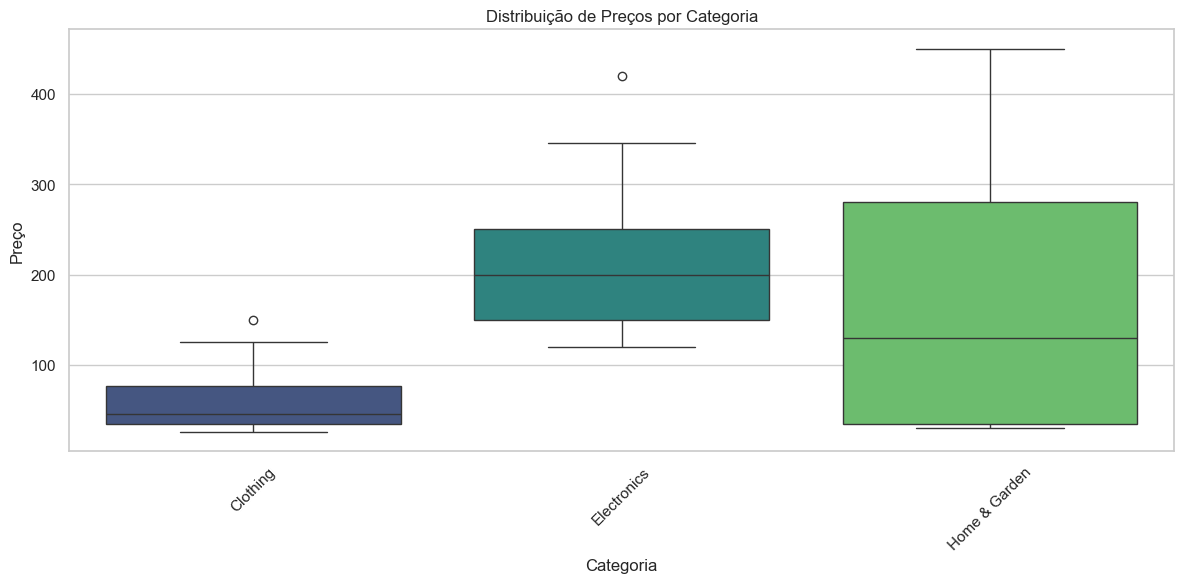

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumindo que purchase_df já foi atualizado e contém as colunas 'Categoria' e 'Preço'

# Análise descritiva dos preços por categoria
price_stats = purchase_df.groupby('Categoria')['Preço'].describe()

# Exibindo as estatísticas descritivas
print("Estatísticas descritivas dos preços por categoria:")
print(price_stats)

# Visualizando as distribuições de preços por categoria com um boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=purchase_df, x='Categoria', y='Preço', palette='viridis')
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
